In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [62]:
# get price data from yfinance
company = 'INFY.NS'
start_date = '2014-06-01'
end_date = '2024-08-03'
yf_data = yf.download(company, start=start_date, end = end_date)
yf_data = yf_data.resample('D').ffill()
yf_data = pd.DataFrame(yf_data['Close'])

[*********************100%%**********************]  1 of 1 completed


In [103]:
data_p_n_l = pd.read_excel("../../data/Infosys.xlsx", skiprows=15, sheet_name = "Data Sheet", nrows=15)
data_p_n_l = data_p_n_l.T

# update header
new_header = data_p_n_l.iloc[0] #grab the first row for the header
data_p_n_l = data_p_n_l[1:] #take the data less the header row
data_p_n_l.columns = new_header #set the header row as the df header


In [109]:
data_p_n_l['Date'] = pd.to_datetime(data.index)

data_p_n_l = data_p_n_l.set_index(data['Date'])
data_p_n_l = data_p_n_l.drop(columns=["Date"])
data_p_n_l = data_p_n_l.dropna(axis=1)

In [110]:
# Add price to the data frame
price = yf_data.loc[data['Date']]['Close']
price.values
data_p_n_l['Close'] = price.values

In [111]:
data_p_n_l

Report Date,Sales,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Profit before tax,Tax,Net profit,Dividend Amount,Close
Date,,,,,,,,,,,,,
2015-03-31,53319.0,219.0,3979.0,29811.0,3385.0,1042.0,3430.0,1017.0,17284.0,4911.0,12372.0,6806.8,554.587524
2016-03-31,62441.0,217.0,5860.0,34415.0,4441.0,429.0,3120.0,1459.0,18740.0,5251.0,13489.0,5548.4,609.150024
2017-03-31,68484.0,228.0,6712.0,37669.0,4584.0,687.0,3050.0,1703.0,19951.0,5598.0,14353.0,5891.6,511.125000
2018-03-31,70522.0,207.0,7286.0,38902.0,4585.0,720.0,3311.0,1863.0,20270.0,4241.0,16029.0,9465.6,565.900024
2019-03-31,82675.0,221.0,9902.0,45323.0,5553.0,1506.0,2882.0,2011.0,21041.0,5631.0,15404.0,9222.5,737.799988
2020-03-31,90791.0,229.0,11086.0,50895.0,5375.0,939.0,2803.0,2893.0,22007.0,5368.0,16594.0,7427.0,641.500000
2021-03-31,100472.0,143.0,12800.0,55547.0,3194.0,899.0,2201.0,3267.0,26628.0,7205.0,19351.0,11469.6,1368.050049
2022-03-31,121641.0,132.0,20690.0,63997.0,4305.0,1026.0,2295.0,3476.0,30110.0,7964.0,22110.0,13007.6,1906.849976
2023-03-31,146767.0,176.0,26330.0,78374.0,5300.0,1457.0,2701.0,4225.0,33322.0,9214.0,24095.0,14069.2,1427.949951


In [112]:
data_p_n_l.columns

Index(['Sales', 'Power and Fuel', 'Other Mfr. Exp', 'Employee Cost',
       'Selling and admin', 'Other Expenses', 'Other Income', 'Depreciation',
       'Profit before tax', 'Tax', 'Net profit', 'Dividend Amount', 'Close'],
      dtype='object', name='Report Date')

In [113]:
data_p_n_l.dtypes

Report Date
Sales                 object
Power and Fuel        object
Other Mfr. Exp        object
Employee Cost         object
Selling and admin     object
Other Expenses        object
Other Income          object
Depreciation          object
Profit before tax     object
Tax                   object
Net profit            object
Dividend Amount       object
Close                float64
dtype: object

In [115]:
# Problem = create a percentage change for each column and then create a heat map. 
pl = pd.DataFrame()
for col in data_p_n_l:
    # print(col)
    pl[col] = data_p_n_l[col].pct_change()*100

In [116]:
pl.dropna()

,Sales,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Profit before tax,Tax,Net profit,Dividend Amount,Close
Date,,,,,,,,,,,,,
2016-03-31,17.108348,-0.913242,47.273184,15.443964,31.196455,-58.829175,-9.037901,43.461160,8.423976,6.923234,9.028451,-18.487395,9.838393
2017-03-31,9.677936,5.069124,14.539249,9.455179,3.219995,60.139860,-2.243590,16.723783,6.462113,6.608265,6.405219,6.185567,-16.092099
2018-03-31,2.975878,-9.210526,8.551847,3.273249,0.021815,4.803493,8.557377,9.395185,1.598917,-24.240800,11.677001,60.662638,10.716561
2019-03-31,17.232920,6.763285,35.904474,16.505578,21.112323,109.166667,-12.956811,7.944176,3.803651,32.775289,-3.899183,-2.568247,30.376384
2020-03-31,9.816752,3.619910,11.957180,12.293979,-3.205475,-37.649402,-2.741152,43.858777,4.591037,-4.670574,7.725266,-19.468691,-13.052316
2021-03-31,10.662951,-37.554585,15.460942,9.140387,-40.576744,-4.259851,-21.476989,12.927757,20.997864,34.221311,16.614439,54.431130,113.257997
2022-03-31,21.069552,-7.692308,61.640625,15.212343,34.783970,14.126808,4.270786,6.397306,13.076461,10.534351,14.257661,13.409360,39.384519
2023-03-31,20.655864,33.333333,27.259546,22.465116,23.112660,42.007797,17.690632,21.547756,10.667552,15.695630,8.977838,8.161383,-25.114720
2024-03-31,4.703373,13.068182,3.285226,5.438028,7.641509,3.637612,74.416883,10.721893,8.000720,5.708704,8.873210,35.424900,4.909142


<Axes: ylabel='Date'>

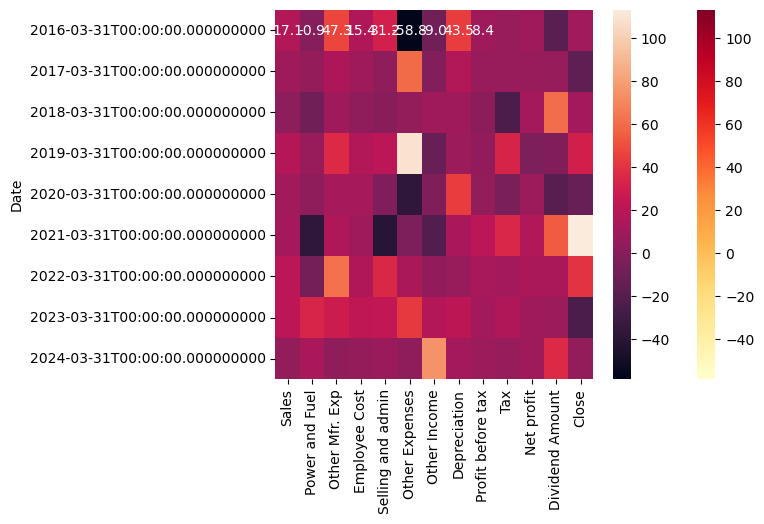

In [128]:

sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(pl.dropna(), cmap='YlOrRd')
sns.heatmap(pl.dropna(), annot=True, fmt=".1f")

In [129]:
# correlation 
corr = pl.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Sales,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Profit before tax,Tax,Net profit,Dividend Amount,Close
Sales,1.00,0.26,0.86,0.93,0.60,0.21,-0.36,0.10,0.31,0.54,-0.14,-0.55,0.01
Power and Fuel,0.26,1.00,-0.01,0.48,0.62,0.30,0.49,0.17,-0.49,-0.14,-0.52,-0.47,-0.86
Other Mfr. Exp,0.86,-0.01,1.00,0.64,0.69,0.03,-0.37,0.03,0.22,0.31,-0.02,-0.45,0.14
Employee Cost,0.93,0.48,0.64,1.00,0.55,0.22,-0.29,0.27,0.17,0.49,-0.29,-0.65,-0.20
Selling and admin,0.60,0.62,0.69,0.55,1.00,0.14,0.19,0.09,-0.38,-0.12,-0.37,-0.56,-0.54
Other Expenses,0.21,0.30,0.03,0.22,0.14,1.00,-0.05,-0.65,-0.18,0.42,-0.62,0.05,-0.06
Other Income,-0.36,0.49,-0.37,-0.29,0.19,-0.05,1.00,-0.22,-0.18,-0.30,0.04,0.24,-0.39
Depreciation,0.10,0.17,0.03,0.27,0.09,-0.65,-0.22,1.00,-0.15,-0.22,-0.03,-0.68,-0.37
Profit before tax,0.31,-0.49,0.22,0.17,-0.38,-0.18,-0.18,-0.15,1.00,0.62,0.64,0.28,0.71
Tax,0.54,-0.14,0.31,0.49,-0.12,0.42,-0.30,-0.22,0.62,1.00,-0.21,-0.12,0.54


In [130]:
corr

,Sales,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Profit before tax,Tax,Net profit,Dividend Amount,Close
Sales,1.000000,0.259562,0.858075,0.930781,0.599476,0.205830,-0.361214,0.102720,0.313538,0.535771,-0.141804,-0.552461,0.013404
Power and Fuel,0.259562,1.000000,-0.009360,0.482733,0.623774,0.300245,0.493100,0.165897,-0.486105,-0.136627,-0.518090,-0.473690,-0.857605
Other Mfr. Exp,0.858075,-0.009360,1.000000,0.643398,0.686174,0.028277,-0.373221,0.027638,0.215776,0.308279,-0.019239,-0.446151,0.136944
Employee Cost,0.930781,0.482733,0.643398,1.000000,0.548057,0.222632,-0.294142,0.270575,0.171050,0.486590,-0.286724,-0.648775,-0.199851
Selling and admin,0.599476,0.623774,0.686174,0.548057,1.000000,0.140173,0.185662,0.085341,-0.380332,-0.118524,-0.368582,-0.562175,-0.541146
Other Expenses,0.205830,0.300245,0.028277,0.222632,0.140173,1.000000,-0.047806,-0.654870,-0.183731,0.424763,-0.617710,0.050439,-0.055178
Other Income,-0.361214,0.493100,-0.373221,-0.294142,0.185662,-0.047806,1.000000,-0.222406,-0.181163,-0.300633,0.043573,0.238618,-0.386803
Depreciation,0.102720,0.165897,0.027638,0.270575,0.085341,-0.654870,-0.222406,1.000000,-0.147548,-0.218887,-0.028719,-0.677150,-0.370640
Profit before tax,0.313538,-0.486105,0.215776,0.171050,-0.380332,-0.183731,-0.181163,-0.147548,1.000000,0.617301,0.638109,0.281920,0.712671
Tax,0.535771,-0.136627,0.308279,0.486590,-0.118524,0.424763,-0.300633,-0.218887,0.617301,1.000000,-0.207075,-0.118723,0.543925


In [139]:
corr[corr['Close']> 0.7][:-1].index[0]

'Profit before tax'

In [144]:
corr['Profit before tax'].values

array([ 0.31353776, -0.48610501,  0.21577585,  0.17104978, -0.38033214,
       -0.18373101, -0.18116306, -0.14754755,  1.        ,  0.61730102,
        0.63810866,  0.28192031,  0.7126708 ])

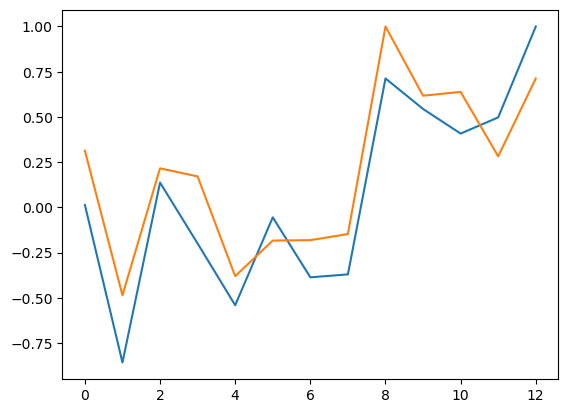

In [148]:
a = corr[['Close', 'Profit before tax']].values
plt.plot(a)